In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import scipy
import itertools

In [25]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\1997-01-01-2009-12-31-Somalia.csv"
df = pd.read_csv(file, sep=';')

In [26]:
v= df["event_date"]
v= v.values
dt = [datetime.strptime(v[i], "%d %B %Y") for i in range(len(v))]
q=[]

for i in range(len(dt)):
    q.append(datetime.timestamp(dt[i]))
    
df.insert(loc=3, column='date_timestamp', value=q)
df.sort_values("date_timestamp", inplace = True)

In [27]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.set_index('event_date', inplace=True)

In [28]:
fa=df[df['fatalities']>0]
n_conf=df.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()

In [31]:
df['event_type'].unique(),len(df)

(array(['Violence against civilians', 'Battles', 'Strategic developments',
        'Explosions/Remote violence', 'Protests', 'Riots'], dtype=object),
 10704)

In [38]:
aw=df[df['admin1']=='Awdal']

In [35]:
batt=df[df['event_type']=='Violence against civilians']
n_batt=batt.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()
len(batt)

3014

Text(0.5, 0, 'Event date')

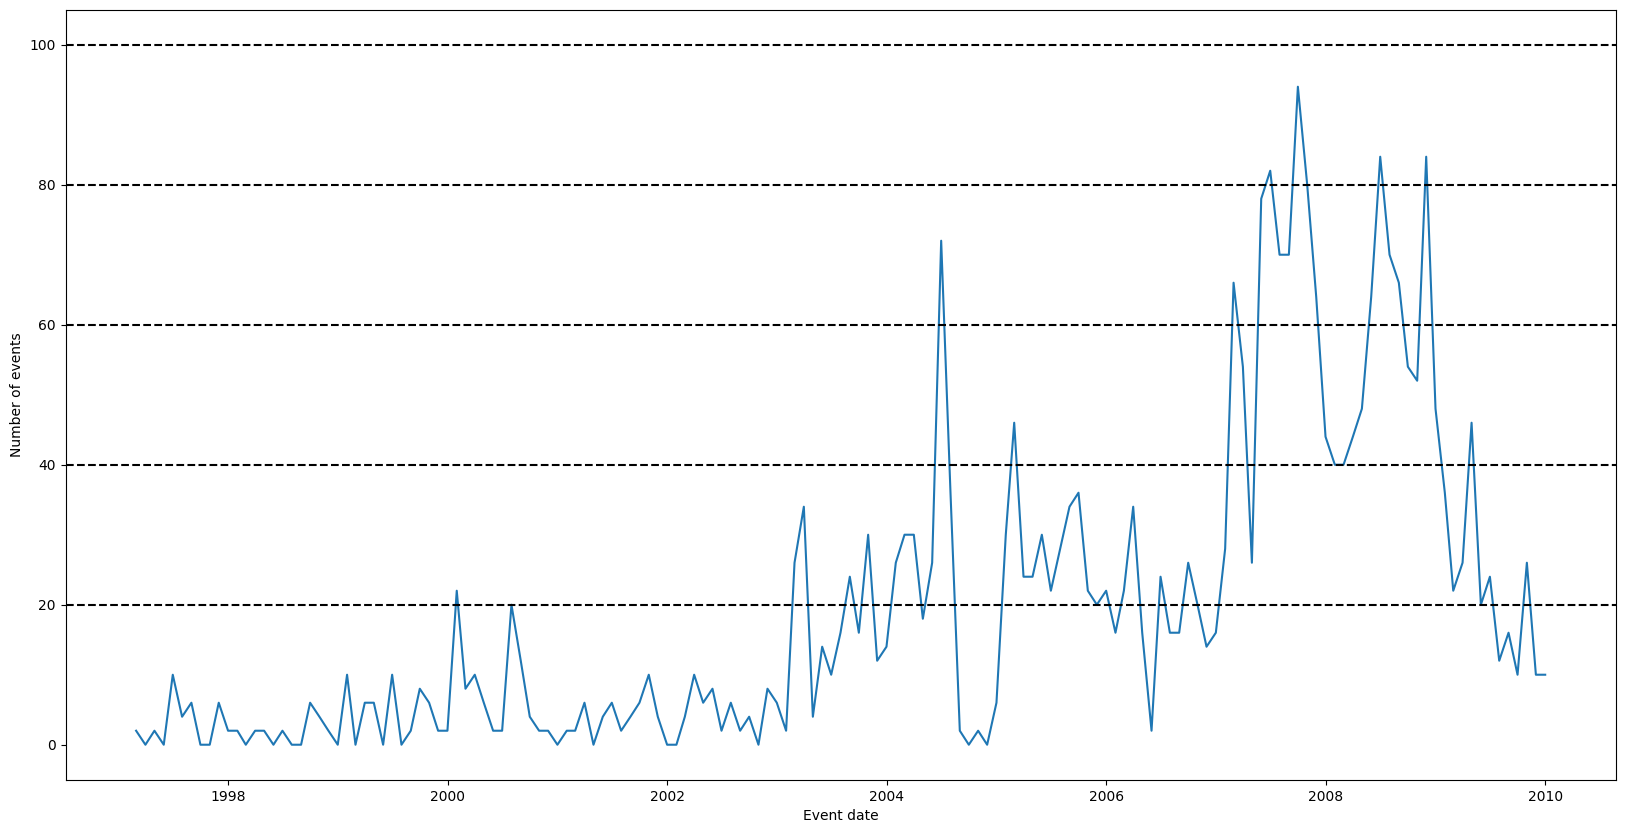

In [36]:
plt.figure(figsize=(20,10))
plt.plot(n_batt)
#plot horizontal line at y=80, 60, 40

plt.axhline(y=20, color='k', linestyle='--')
plt.axhline(y=40, color='k', linestyle='--')
plt.axhline(y=60, color='k', linestyle='--')
plt.axhline(y=80, color='k', linestyle='--')
plt.axhline(y=100, color='k', linestyle='--')
plt.ylabel("Number of events")
plt.xlabel("Event date")

In [7]:
len(fa)

4074

In [117]:
fa.groupby(['admin1'])['event_id_cnty'].count()

admin1
Awdal                 8
Bakool               42
Banadir            2286
Bari                 68
Bay                 348
Galgaduud           108
Gedo                 84
Hiraan              228
Lower Juba          202
Lower Shabelle      298
Middle Juba          56
Middle Shabelle     140
Mudug               106
Nugaal               26
Sanaag               10
Sool                 20
Togdheer             16
Woqooyi Galbeed      28
Name: event_id_cnty, dtype: int64

In [127]:
aw=df[df['admin1']=='Awdal']
aw[aw['fatalities']>0]

,event_id_cnty,year,date_timestamp,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
event_date,,,,,,,,,,,,,,,,,,,,,
1999-10-07,SOM127,1999,9.392472e+08,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Somalia),NaN,3,...,Borama,9.9387,43.1839,1,M2 Press Wire,International,Italian doctor killed by unnamed gunmen.,1,NaN,1567465437
1999-10-07,SOM127,1999,9.392472e+08,1,Political violence,Violence against civilians,Attack,Civilians (Somalia),Health Workers (Somalia),7,...,Borama,9.9387,43.1839,1,M2 Press Wire,International,Italian doctor killed by unnamed gunmen.,1,NaN,1567465437
2002-09-25,SOM381,2002,1.032905e+09,1,Political violence,Battles,Armed clash,Military Forces of Ethiopia (1991-2018),NaN,8,...,Jalelo,10.9833,42.9833,1,Undisclosed Source,Local partner-Other,ONLF attacks Ethiopian soldiers,5,NaN,1625524576
2002-09-25,SOM381,2002,1.032905e+09,1,Political violence,Battles,Armed clash,ONLA: Ogaden National Liberation Army,NaN,2,...,Jalelo,10.9833,42.9833,1,Undisclosed Source,Local partner-Other,ONLF attacks Ethiopian soldiers,5,NaN,1625524576
2008-10-25,SOM4584,2008,1.224886e+09,1,Political violence,Riots,Mob violence,Rioters (Somalia),NaN,5,...,Borama,9.9387,43.1839,1,Garowe Online,National,19-year-old girl was killed in Borama after So...,1,NaN,1572403718
2008-10-25,SOM4584,2008,1.224886e+09,1,Political violence,Riots,Mob violence,Police Forces of Somaliland (2001-2010),NaN,1,...,Borama,9.9387,43.1839,1,Garowe Online,National,19-year-old girl was killed in Borama after So...,1,NaN,1572403718
2009-10-04,SOM5456,2009,1.254607e+09,1,Political violence,Battles,Armed clash,Military Forces of Ethiopia (1991-2018),NaN,8,...,Jalelo,10.9833,42.9833,1,All Africa,International,ONLF claim victory against Ethiopian military ...,6,NaN,1625524575
2009-10-04,SOM5456,2009,1.254607e+09,1,Political violence,Battles,Armed clash,ONLA: Ogaden National Liberation Army,NaN,2,...,Jalelo,10.9833,42.9833,1,All Africa,International,ONLF claim victory against Ethiopian military ...,6,NaN,1625524575


In [113]:
b=df[df['event_type']=='Battles']
c=df[df['event_type']=='Violence against civilians']
print('total: ', len(df))
print('battles: ', len(b))
print('violence against civilians: ', len(c))

b1=fa[fa['event_type']=='Battles']
c1=fa[fa['event_type']=='Violence against civilians']
print('total, >0 fatalities: ', len(fa))
print('battles + violence against civilians, >0 fatalities: ', len(b1)+len(c1))

total:  10704
battles:  5224
violence against civilians:  3014
total, >0 fatalities:  4074
battles + violence against civilians, >0 fatalities:  3068


In [89]:
reg = df.groupby(["region"])["fatalities"].sum().index.tolist()
viol = df.groupby(["event_type"])["fatalities"].sum().index.tolist()

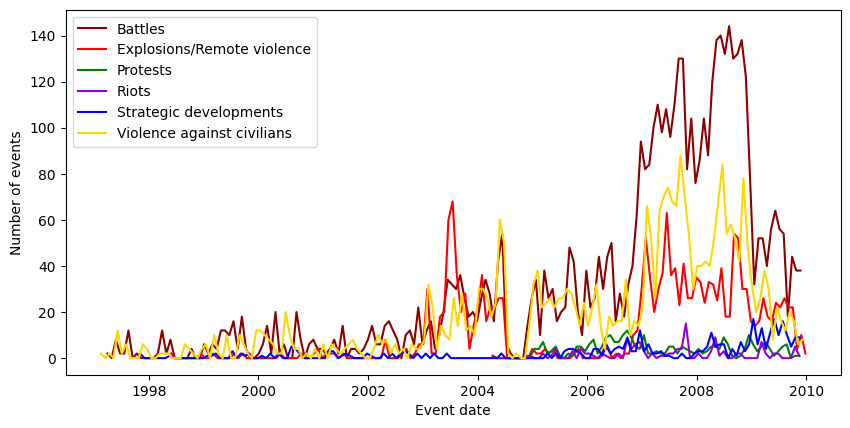

In [102]:
plt.figure(figsize=(10,5))
color_dict = {'Protests': 'green', 'Riots': 'darkviolet', 'Battles': 'darkred','Explosions/Remote violence': 'red', 'Strategic developments': 'blue',
'Violence against civilians': 'gold'}
for region in reg:
    re=df.loc[df["region"] == region]
    for typ in viol:
        pro = re.loc[re["event_type"] == typ]["fatalities"]
        g_pro = pro.groupby(pd.Grouper(freq='40320min')).count()
        if g_pro.empty == False:              
            plt.plot(g_pro, label=typ, color=color_dict[typ])
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend()
    plt.subplots_adjust(bottom=0.15)
    #plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Plot timeline regions\timeline_%s" %region, dpi=700)
    plt.show()